<a href="https://colab.research.google.com/github/MTharreq/MachineLearning_UTS/blob/main/TugasUTS_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Module and Load Data

In [8]:
#IMPORT MODULE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
#LOAD DATASET
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head(-10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,1
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,1
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742,1
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969,1


In [10]:
#CHECK INFORMATION OF DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [28]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Visualize Data Trends using Seaborn

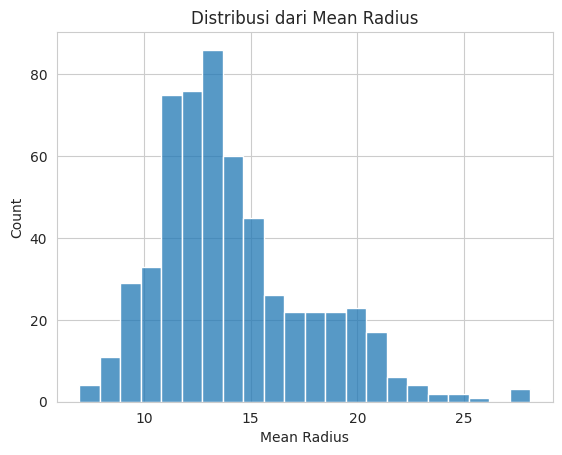

In [34]:
#VISUALISASI DATA DENGAN HISTOGRAM
sns.histplot(cancer['data'][:,0])

plt.title("Distribusi dari Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='target', ylabel='count'>

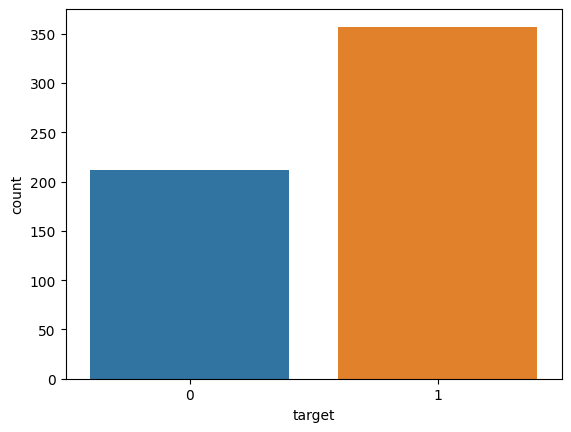

In [13]:
#VISUALISASI DARI TARGET VARIABEL (M / B)
sns.countplot(x='target', data=df)

<Axes: >

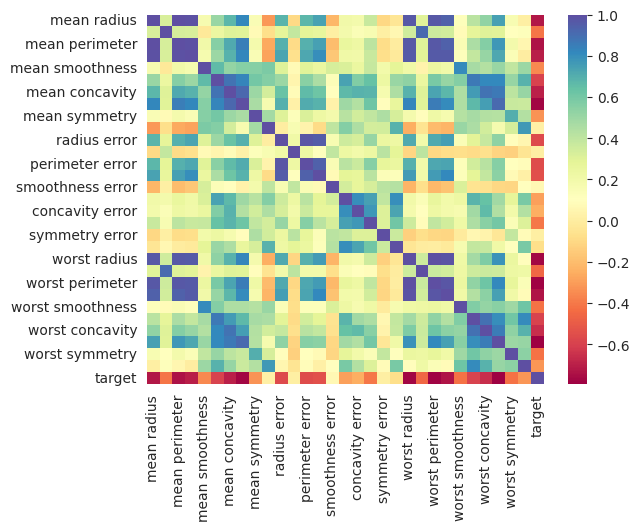

In [33]:
#VISUALISASI KORELASI ANTARA BEBERAPA FEATURES
correlation_matrix = df.corr()

sns.heatmap(df.corr(), cmap='Spectral')

# Decision Tree

In [41]:
#DECISION TREE UNTUK MELAKUKAN PEMANGKASAN KOMPLEKSITAS BIAYA
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {}".format(clfs[-1].tree_.node_count))
print("With ccp_alpha: {}".format(ccp_alphas[-1]))

Number of nodes in the last tree is: 1
With ccp_alpha: 0.3272984419327777


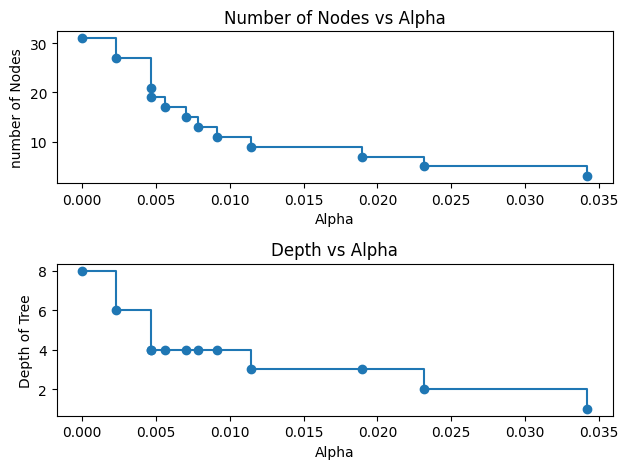

In [16]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

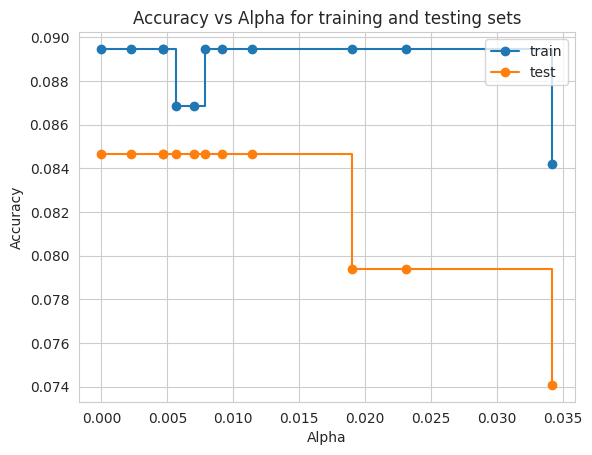

In [37]:
#VISUALISASI PLOT HASIL AKURASI DARI DATA TRAIN DAN HASIL TEST
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
     

In [19]:
X = cancer.data
y = cancer.target

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize Random Forest classifier
dt = DecisionTreeClassifier(random_state=42)

#Train the classifier on the training data
dt.fit(X_train, y_train)

#Predictions on the testing data
y_pred = dt.predict(X_test)

#Evaluating the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)

#Evaluate the accuracy of the model on the testing data
print("Accuracy on testing set: {:.3f}".format(dt.score(X_test, y_test)))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy on testing set: 0.942
Accuracy: 94.15%


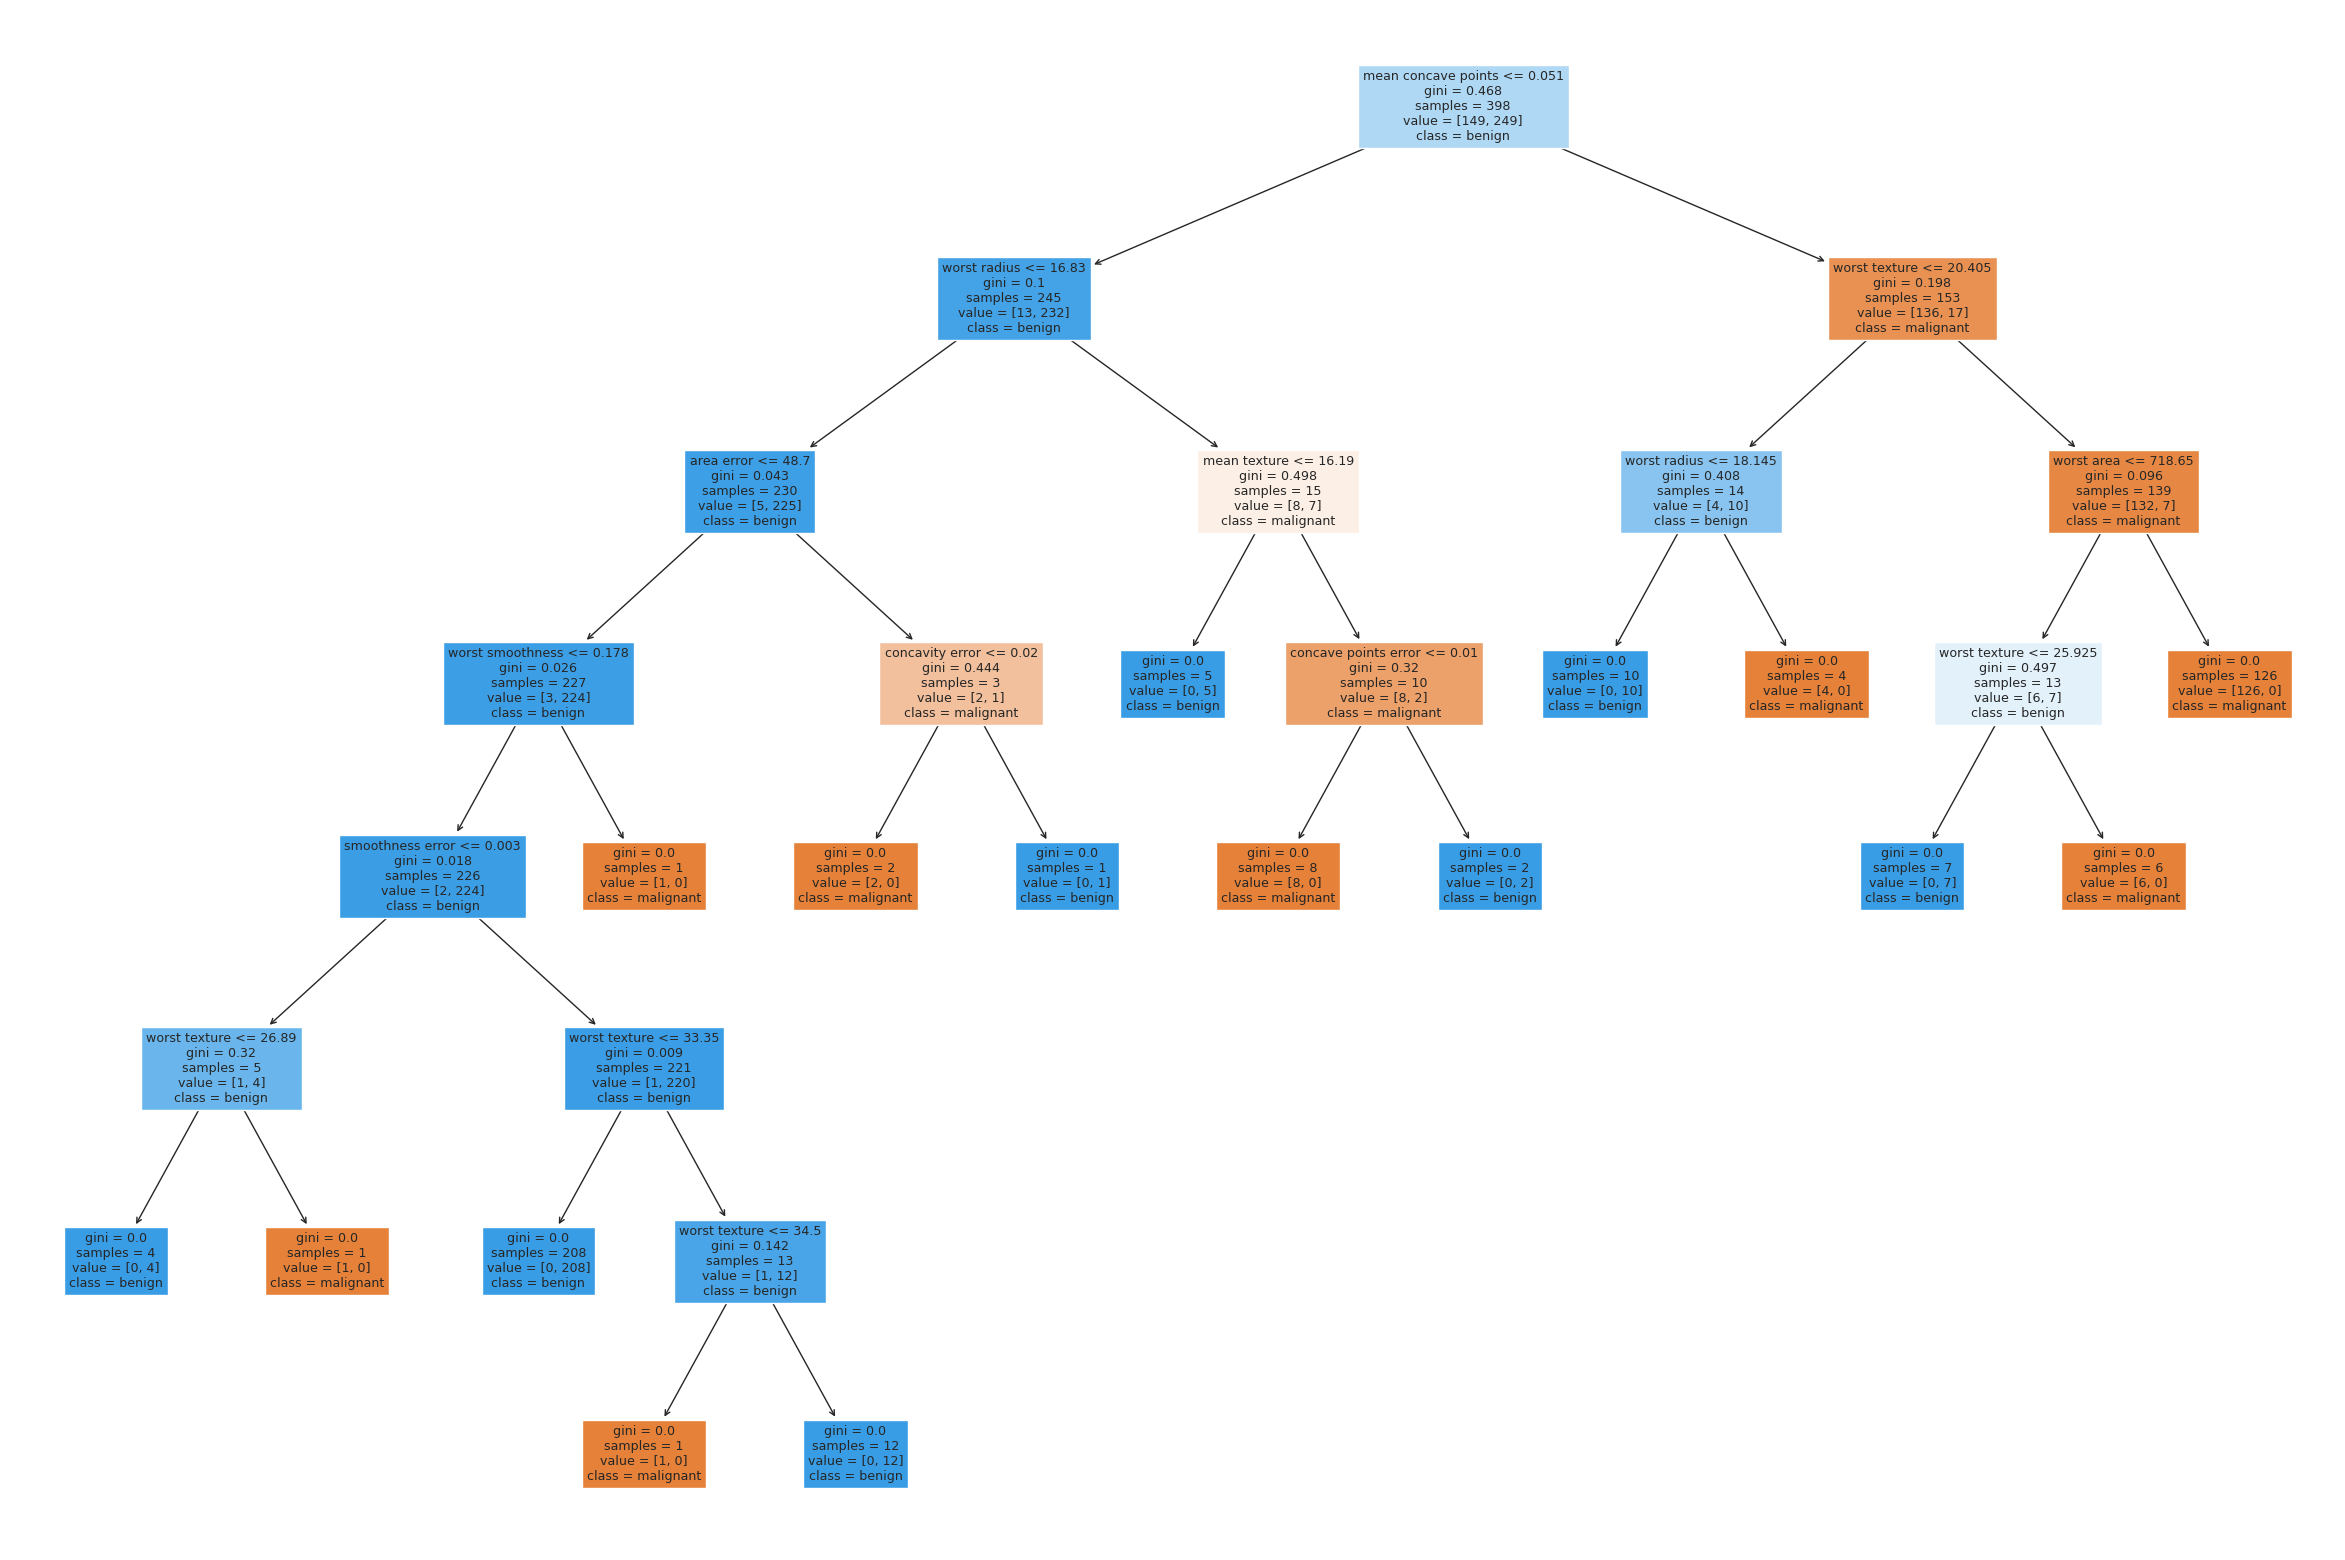

In [38]:
#VISUALISASI DARI DECISION TREE
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(dt, 
                   feature_names=cancer.feature_names,  
                   class_names=cancer.target_names,
                   filled=True)

# Explore Data using Random Forest

In [21]:
#MEMISAHKAN DATA MENJADI TRAINING DAN TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

#INISIALISASI RANDOM FOREST CLASSIFIER
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#TRAIN DATA CLASSIFER PADA TRAINING DATA
rfc.fit(X_train, y_train)

#MELAKUKAN PREDIKSI DARI HASIL TESTING DATA
y_pred = rfc.predict(X_test)

#EVALUASI TINGKAT AKURASI DARI HASIL CLASSIFIER TESTING DATA
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

Accuracy: 97.076%


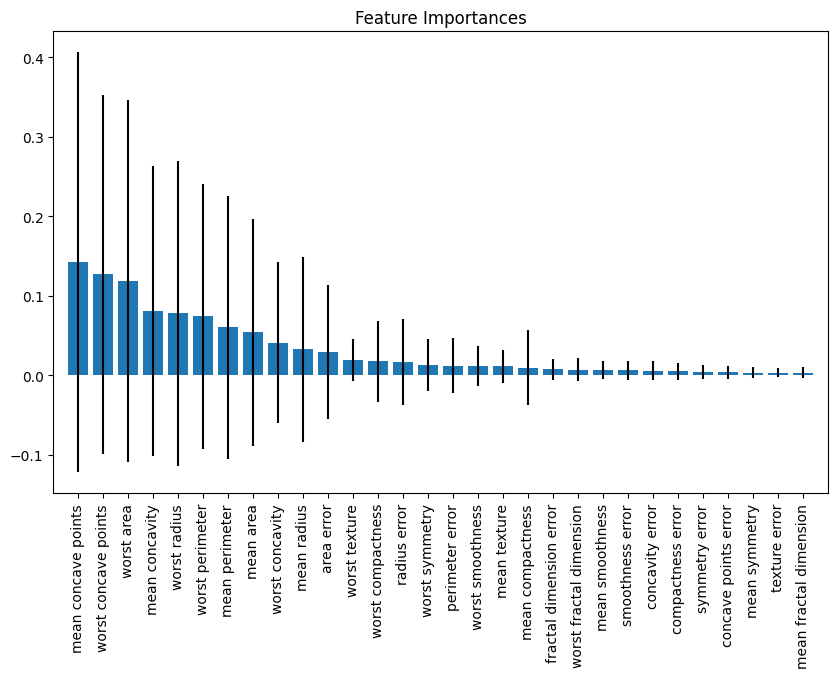

In [22]:
#PLOT FEATURE IMPORTANCES
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
t.show()

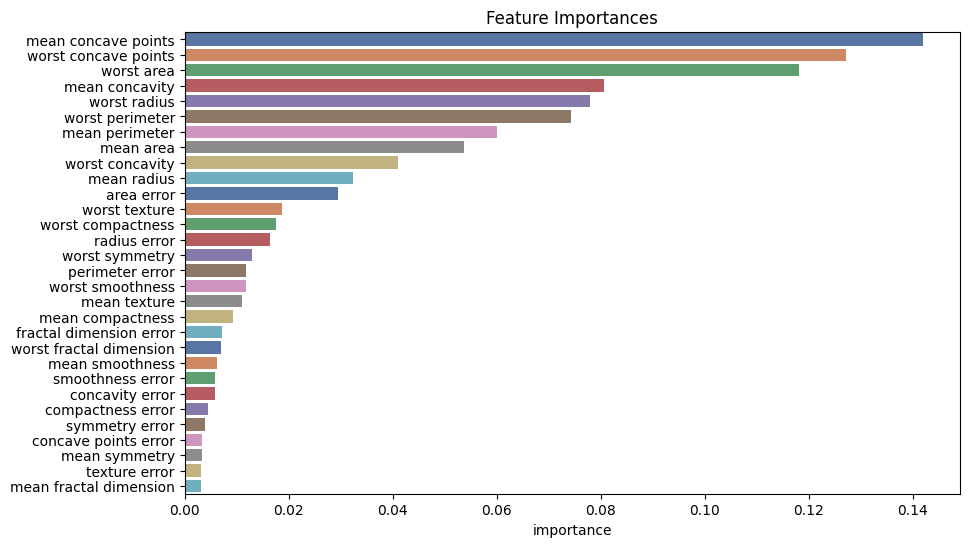

In [23]:
#PLOT FEATURE IMPORTANCES MENGGUNAKAN SEABORN
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame(importances[indices], index=cancer.feature_names[indices], columns=['importance'])
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette="deep")
plt.title("Feature Importances")
plt.show()

Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<Axes: >

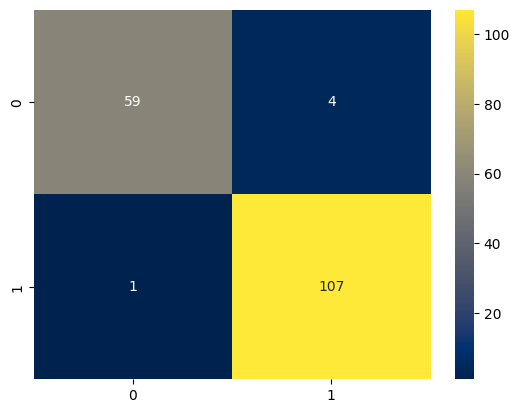

In [24]:
#EVALUASI PERFORMA DARI MODEL
print("Accuracy:", accuracy_score(y_test, y_pred))
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred, zero_division=1))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='cividis', fmt='g')

# Explore Data using Self-Training

In [25]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

#Initialize a Random Forest classifier for self-training
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#Initialize a self-training classifier
self_training = SelfTrainingClassifier(rfc, threshold=0.9, max_iter=100)

#Fit the self-training classifier on the training data
self_training.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = self_training.predict(X_test)

#Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

Accuracy: 97.076%


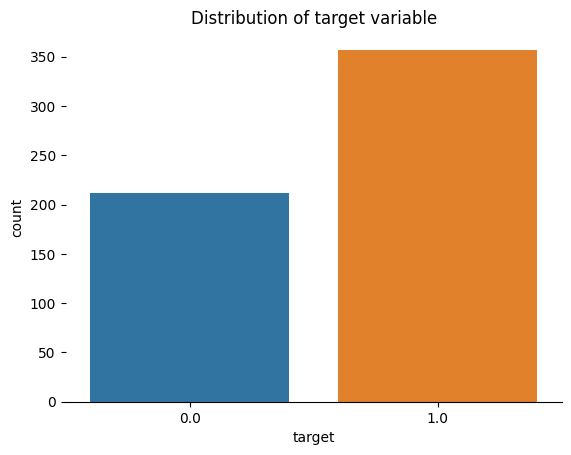

In [26]:
#UBAH DATA MENJADI PANDAS DATAFRAME
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

#LAKUKAN PLOT DISTRIBUSI DARI TARGET VARIABEL
sns.countplot(data=df, x='target')
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Distribution of target variable')
plt.show()

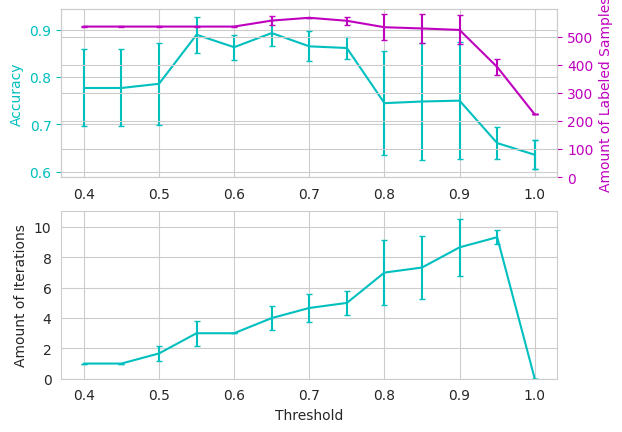

In [27]:
n_splits = 3
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=42)
y_true = y.copy()
y[50:] = -1
total_samples = y.shape[0]

base_classifier = SVC(probability=True, gamma=0.001, random_state=42)

x_values = np.arange(0.4, 1.05, 0.05)
x_values = np.append(x_values, 0.99999)
scores = np.empty((x_values.shape[0], n_splits))
amount_labeled = np.empty((x_values.shape[0], n_splits))
amount_iterations = np.empty((x_values.shape[0], n_splits))

for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    #Manual Cross Validation to Avoid Treating -1 as a Separate Class When Computing Accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        #The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        #The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test_true, y_pred)


ax1 = plt.subplot(211)
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="c"
)
ax1.set_ylabel("Accuracy", color="c")
ax1.tick_params("y", colors="c")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="m",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of Labeled Samples", color="m")
ax2.tick_params("y", colors="m")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="c",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of Iterations")
ax3.set_xlabel("Threshold")

plt.show()